# External Data Integration

In this notebook, we will integrate the external weather data with our building energy consumption data.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [4]:
# Load building data (using the processed hourly data)
building_df = pd.read_csv('../data/processed/hourly_training_data.csv')
building_df['record_timestamp'] = pd.to_datetime(building_df['record_timestamp'])
building_df.rename(columns={'record_timestamp': 'date'}, inplace=True)

# Load weather data
weather_2023_df = pd.read_csv('../data/raw/external/hk_weather_2023.csv')
weather_2024_df = pd.read_csv('../data/raw/external/hk_weather_2024_jan.csv')
weather_df = pd.concat([weather_2023_df, weather_2024_df])
weather_df['date'] = pd.to_datetime(weather_df['date'])

## Merge Data

In [5]:
# Merge the two dataframes on the date column
df = pd.merge(building_df, weather_df, on='date', how='left')
df.head()

,date,CHR-01-KW,CHR-01-CHWSWT,CHR-01-CHWRWT,CHR-01-CHWFWR,CHR-02-KW,CHR-02-CHWSWT,CHR-02-CHWRWT,CHR-02-CHWFWR,CHR-03-KW,CHR-03-CHWSWT,CHR-03-CHWRWT,CHR-03-CHWFWR,CHR-01-CL,CHR-02-CL,CHR-03-CL,Total_Cooling_Load,temperature_celsius,humidity_percent,wind_speed_kmh
0,2023-01-01 00:00:00,0.0,12.200,11.725,0.0,2.219325,8.525,8.950,1.802083,6.571517,9.500,11.050,3.611112,0.0,0.002727,0.007657,0.010384,21.244602,62.422903,21.822301
1,2023-01-01 01:00:00,0.0,12.000,11.600,0.0,0.000000,9.350,9.300,0.000000,7.531133,7.325,8.475,7.048612,0.0,0.000000,0.009434,0.009434,NaN,NaN,NaN
2,2023-01-01 02:00:00,0.0,11.900,11.600,0.0,0.000000,9.625,9.375,0.000000,7.086580,6.750,8.075,7.115972,0.0,0.000000,0.010953,0.010953,NaN,NaN,NaN
3,2023-01-01 03:00:00,0.0,11.825,11.575,0.0,0.000000,9.750,9.550,0.000000,7.083955,6.725,8.050,7.111808,0.0,0.000000,0.010955,0.010955,NaN,NaN,NaN
4,2023-01-01 04:00:00,0.0,11.750,11.600,0.0,0.000000,9.800,9.700,0.000000,7.224938,6.925,8.175,7.034725,0.0,0.000000,0.010234,0.010234,NaN,NaN,NaN


## Analysis and Visualization

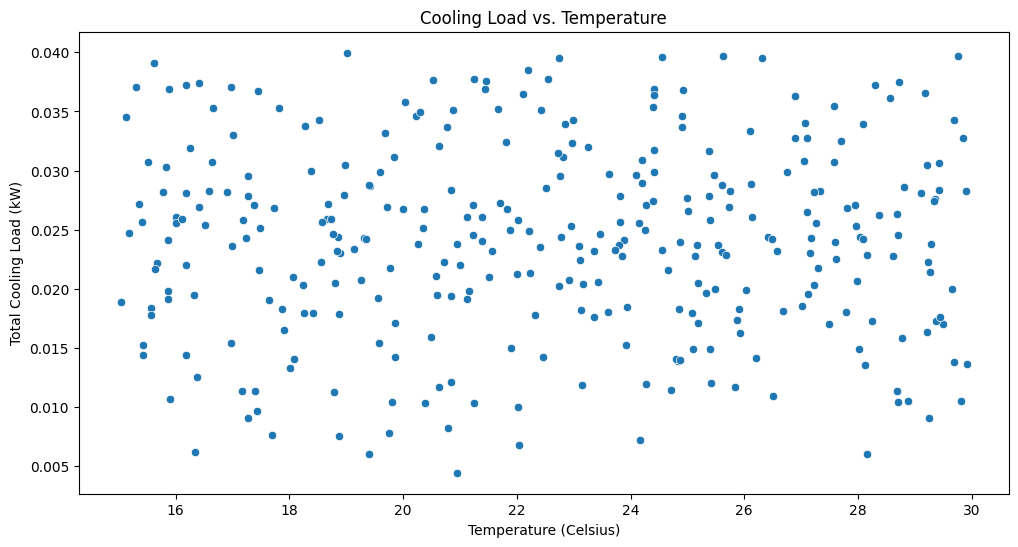

In [6]:
# Plot cooling load vs. temperature
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='temperature_celsius', y='Total_Cooling_Load')
plt.title('Cooling Load vs. Temperature')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Total Cooling Load (kW)')
plt.show()

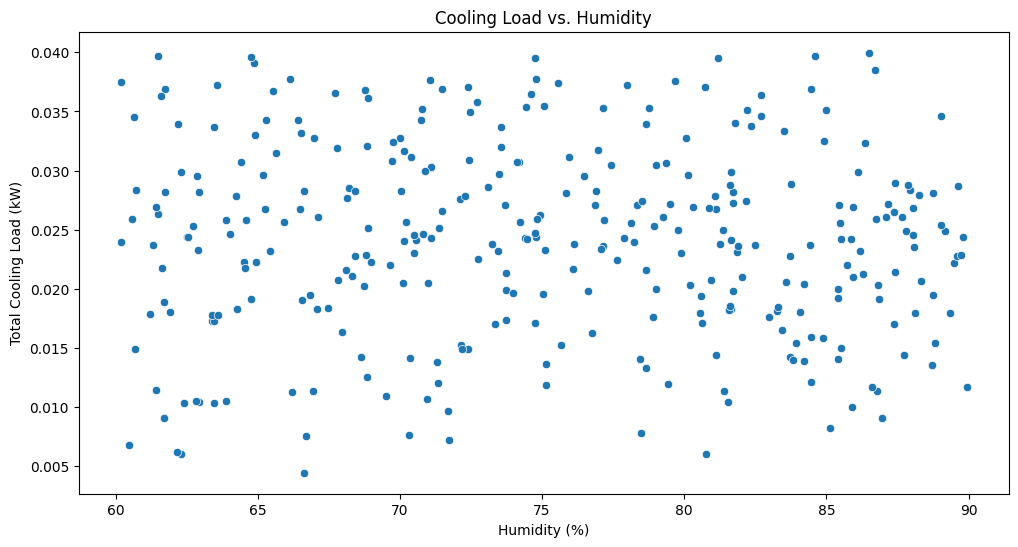

In [7]:
# Plot cooling load vs. humidity
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='humidity_percent', y='Total_Cooling_Load')
plt.title('Cooling Load vs. Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Total Cooling Load (kW)')
plt.show()